# Documentation | Resilient Networks | Exercise 1

## Group Information
- Group Members: Luca Gebhard, Jan Pfeifer
- Date: 10.11.2023



## Introduction
- In this exercise, we explore and analyze resilient networks using Python and the igraph library.

## Tools and Libraries
- Programming Language: Python 3
- Libraries: igraph


## Methodology
- todo

### Step 1: Data Preparation
- We acquired the dataset located in the 'data' directory.
  - Gnutella09
  - lastfm_asia

### Step 2: Analysis
- We computed the following metrics for both graphs:
  - Power-law properties
  - Average and Characteristic path length
  - Density
  - Average clustering coefficient and distribution of clustering coefficient
  - Distribution of Cohesiveness
  - Edge persistence under greedy attack (removing nodes with highest node degree first)
  - Resilience/Survivability against random and targeted attacks (greedy attack)

### Step 3: Visualization
- todo

## Results

In [7]:
# Generating the graph
import os
from src.GraphInput import TxtFileGraphInput
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()

gnutella_file_path = os.path.join(
    notebook_dir, "data/p2p-Gnutella09/p2p-Gnutella09.txt"
)

input = TxtFileGraphInput()
input.read_input_file_and_convert(gnutella_file_path, directed=True)



We calculate the following metrics:
- Density
- Persitence under Greedy Attack
- Average and Characteristic Path length
- Clustering Stats and Plots
- Distribution of cohesiveness
- Resilience/Survivability

In [8]:
# Density
print("Gnutella09 density: ", input.computed_density())

Gnutella09 density:  0.0003951608960942098


In [9]:
# Persistence under Greedy attack
# print("Gnutella09 Edge persistence under greedy attack: ", input.todo())

In [10]:
# Average Path Length
print("Gnutella09 average path length: ", input.compute_average_path_length())

Gnutella09 average path length:  7.054623534882817


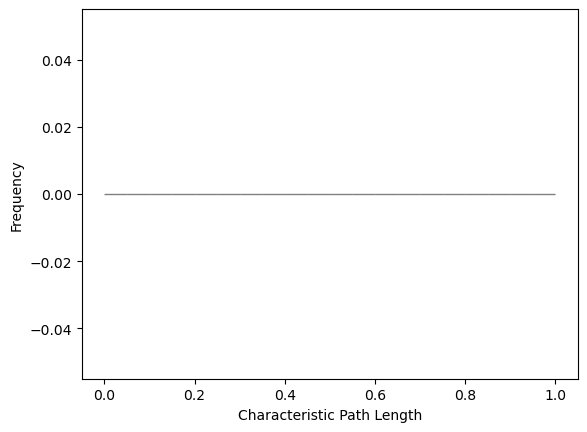

In [11]:
# Characteristic Path Length for all nodes
cpls = input.compute_cpl_for_all_nodes()

# Filter out infinite values from the cpls list
filtered_cpls = [cpl for cpl in cpls if cpl != float('inf')]

# Create a histogram plot for the filtered CPL values
plt.hist(filtered_cpls, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Characteristic Path Length')
plt.ylabel('Frequency')

plt.show()

In [12]:
# Average Clustering Coefficient

(
    average_clustering_coefficient,
    clustering_coefficient_distribution,
) = input.compute_clustering_coefficient()

print("Gnutella09 Average clustering coefficient: ", average_clustering_coefficient)

Gnutella09 Average clustering coefficient:  0.07314316246453513


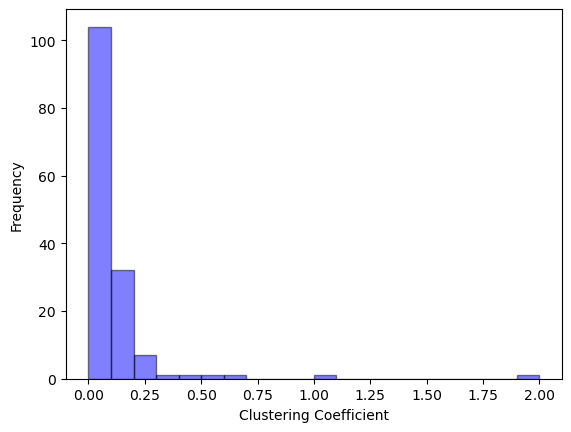

In [13]:
# Clustering Coefficient Distribution
values = list(clustering_coefficient_distribution.keys())
counts = list(clustering_coefficient_distribution.values())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.show()

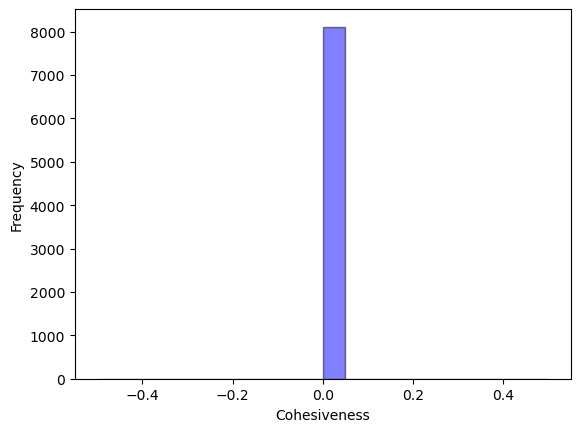

In [14]:
# Distribution of Cohesiveness
cohesiveness_values = input.compute_cohesiveness_for_each_node()
values = list(cohesiveness_values.values())

# Create a histogram plot for the cohesiveness values
plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Cohesiveness')
plt.ylabel('Frequency')

plt.show()

In [15]:
# Resilience/Survivability
# print("Gnutella09 Resilience/Survivability: ", input.todo())

## Conclusion
- Graphs are cool but can be quite complex.